In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import warnings
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,
    ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import pickle

warnings.filterwarnings('ignore')

In [54]:
import pandas as pd
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
file_path = 'transaction.csv'
df = None
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue

if df is None:
    raise Exception("All encoding attempts failed. Unable to read the CSV file")

File successfully read with encoding: utf-8


In [55]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [56]:
df.sample(5)

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
527,T00005486,24/03/24,1:26:56 AM,5037ee93-0dc4-42b1-9b79-0abcf9b40db4,6d1711a5-b6f0-44ae-b897-2256a918a344,18fbfde8-57ff-42c0-8d86-2235abcbd580,Refund,CReditPAY,Dhanbad,Uttar Pradesh,144.109.100.60,Completed,Windows,0,Purchases,Online,26.94,18,23.01,0
427,T00009226,09/10/23,4:15:24 AM,e2838977-fbbf-4fdd-9de6-be5ce06983d6,b3925486-0ea1-4c9f-a831-f59ed779ef91,19500e82-f023-4b27-b2e8-3200bbc3bc3b,Purchase,Sigma Bank,Gurgaon,Gujarat,29.31.198.243,Pending,Android,1,More Services,Mobile,-69.59,28,16.98,0
173,T00009732,19/07/23,3:42:18 AM,cc05c893-df30-443a-8938-0ffce48034bf,0ea07a82-0754-4be6-bd65-1a3182e9873c,1b731d15-9024-4d46-82f0-1dcde517db46,Subscription,CReditPAY,Agra,Chhattisgarh,212.176.198.122,Failed,Android,3,Investment,Online,84.73,9,37.80,0
274,T00027808,14/09/23,4:21:41 AM,281179b6-c81f-4624-b01f-4df1bf2e5522,abf4a847-3bc9-4ab1-9ebc-54b48cc60386,186766a2-52c1-4f85-9af6-50491fe45940,Other,UPI Pay,Kalyan-Dombivli,Bihar,170.145.69.30,Pending,Windows,2,Donations and Devotion,In-store,68.63,29,9.59,0
160,T00037257,07/10/23,6:10:40 AM,77df22aa-6361-459b-833c-2480a8932d5d,be4460e7-5aae-453c-b635-db05804bc4ff,ac91493b-43b3-44de-b553-74a63bb2d394,Bank Transfer,Gamma Bank,Agra,Nagaland,177.121.54.13,Pending,Android,1,Home delivery,In-store,90.03,26,9.88,0


In [57]:
 df.shape

(647, 20)

In [58]:
# 1. Data Cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1.Data Cleaning

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [60]:
df.isnull().sum()

Transaction_ID                  0
Date                            0
Time                            0
Merchant_ID                     0
Customer_ID                     0
Device_ID                       0
Transaction_Type                0
Payment_Gateway                 0
Transaction_City                0
Transaction_State               0
IP_Address                      0
Transaction_Status              0
Device_OS                       0
Transaction_Frequency           0
Merchant_Category               0
Transaction_Channel             0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64

In [61]:
df.duplicated().sum()

0

In [62]:

df.drop_duplicates(inplace=True)

In [63]:
df.shape

(647, 20)

In [64]:
df.nunique()

Transaction_ID                  647
Date                            302
Time                            641
Merchant_ID                     647
Customer_ID                     647
Device_ID                       647
Transaction_Type                  7
Payment_Gateway                   9
Transaction_City                281
Transaction_State                28
IP_Address                      647
Transaction_Status                3
Device_OS                         4
Transaction_Frequency            14
Merchant_Category                10
Transaction_Channel               3
Transaction_Amount_Deviation    635
Days_Since_Last_Transaction      29
amount                          633
fraud                             2
dtype: int64

In [65]:
df = df.drop(['Transaction_ID'],axis=1)

In [66]:
df.head(2)

,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1


In [67]:
df.drop(['Merchant_ID','Customer_ID','Device_ID','IP_Address'],axis=1,inplace=True)

# 2.EDA

In [68]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,20/04/23,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,08/08/23,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,25/06/23,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,28/01/24,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,21/06/23,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [69]:
df['Date']

0      20/04/23
1      08/08/23
2      25/06/23
3      28/01/24
4      21/06/23
         ...   
642    24/07/23
643    05/07/23
644    16/04/23
645    28/10/23
646    11/04/24
Name: Date, Length: 647, dtype: object

In [70]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%y')

In [71]:
import datetime as dt

df['Year'] = df['Date'].dt.year

In [72]:
df['Month'] = df['Date'].dt.month

In [73]:
df['Month'].unique

<bound method Series.unique of 0       4
1       8
2       6
3       1
4       6
       ..
642     7
643     7
644     4
645    10
646     4
Name: Month, Length: 647, dtype: int32>

In [74]:
df['Month'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [75]:
months = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

In [76]:
df['Month']=df['Month'].map(months)

In [77]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [78]:
df.drop(['Date'],axis=1,inplace=True)

In [79]:
df.drop(['Time'],axis=1,inplace=True)

In [80]:
df['fraud'].value_counts(normalize=True)*100

fraud
0    76.043277
1    23.956723
Name: proportion, dtype: float64

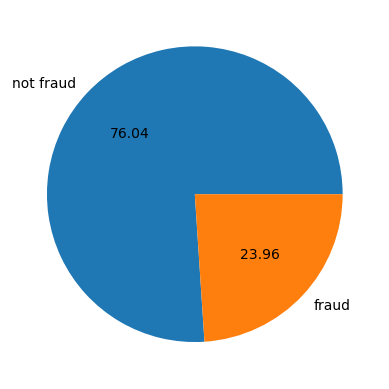

In [81]:
plt.pie(df['fraud'].value_counts(),labels=['not fraud','fraud'],autopct="%0.2f")
plt.show()

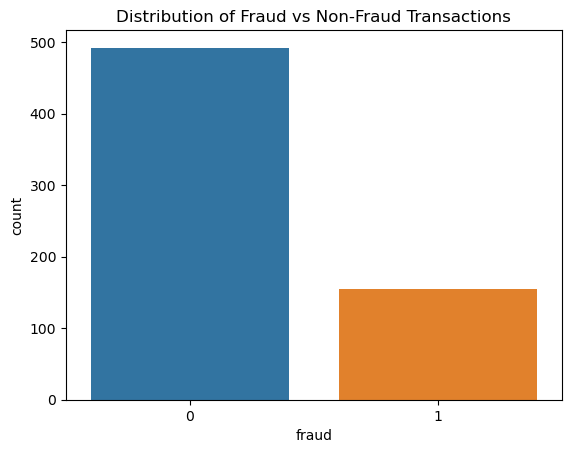

In [82]:
sns.countplot(x='fraud', data=df)
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()

In [83]:
df.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'Year', 'Month'],
      dtype='object')

In [84]:
fraud = df[df['fraud'] ==1]

In [85]:
fraud.head(3)

,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun


In [86]:
fraud.shape

(155, 15)

In [87]:
df.fraud.value_counts()

fraud
0    492
1    155
Name: count, dtype: int64

In [88]:
normal = df[df['fraud'] == 0]

In [89]:
normal.shape

(492, 15)

In [90]:
fraud.head()

,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [91]:
fraud.dtypes

Transaction_Type                 object
Payment_Gateway                  object
Transaction_City                 object
Transaction_State                object
Transaction_Status               object
Device_OS                        object
Transaction_Frequency             int64
Merchant_Category                object
Transaction_Channel              object
Transaction_Amount_Deviation    float64
Days_Since_Last_Transaction       int64
amount                          float64
fraud                             int64
Year                              int32
Month                            object
dtype: object

In [92]:
numeric_columns = fraud.select_dtypes(include=['int64', 'int32', 'float'])

In [93]:
cat_columns = fraud.select_dtypes(include='object')

In [94]:
numeric_columns.corr()

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year
Transaction_Frequency,1.000000,0.112079,0.048399,-0.047628,NaN,-0.068477
Transaction_Amount_Deviation,0.112079,1.000000,-0.057579,-0.034097,NaN,-0.005956
Days_Since_Last_Transaction,0.048399,-0.057579,1.000000,0.078918,NaN,-0.003681
amount,-0.047628,-0.034097,0.078918,1.000000,NaN,0.022114
fraud,NaN,NaN,NaN,NaN,NaN,NaN
Year,-0.068477,-0.005956,-0.003681,0.022114,NaN,1.000000


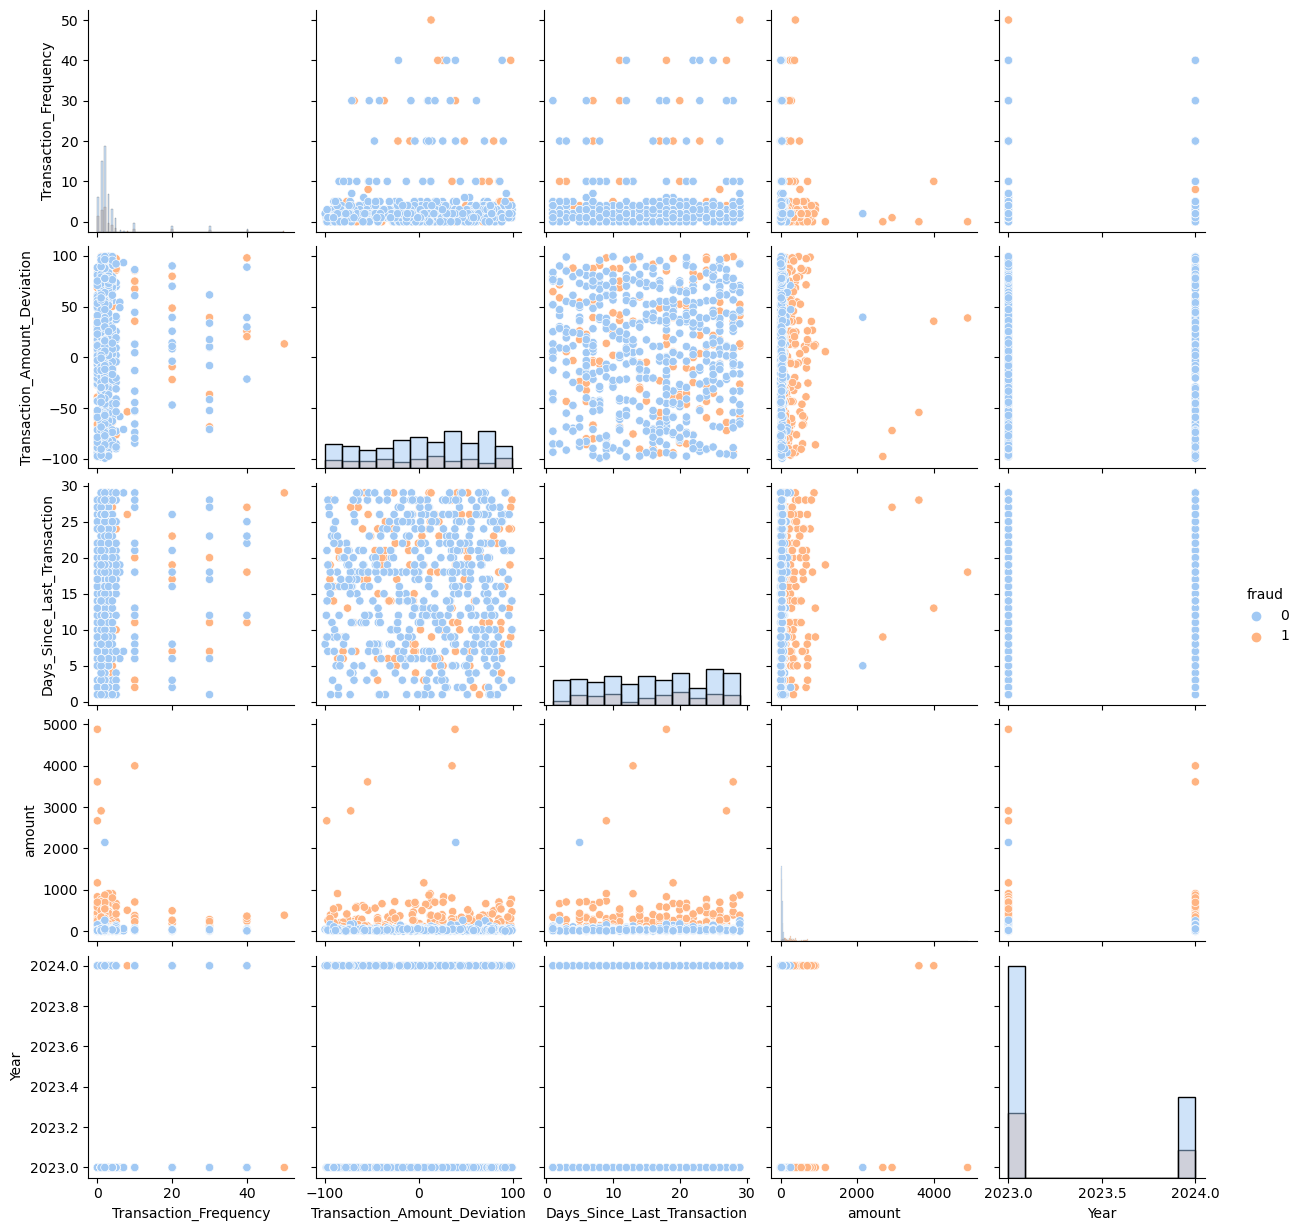

In [95]:
# Visualizing the different features based on fraud occurrences as a subplot
sns.pairplot(data=df, hue='fraud', palette='pastel', diag_kind='hist')

In [96]:
import plotly.express as px

# Plot 1: Fraud distribution by Transaction Type
fig = px.bar(
    x=fraud['Transaction_Type'].value_counts().index,
    y=fraud['Transaction_Type'].value_counts().values,
    color=fraud['Transaction_Type'].value_counts().index,
    title="Fraud distribution by transaction type",
    labels={"x": "Transaction Type", "y": "Fraud Markers"},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(xaxis={"categoryorder": "total descending"})
fig.show()

# Plot 2: Fraud distribution by Payment Gateway
fig = px.bar(
    x=fraud['Payment_Gateway'].value_counts().index,
    y=fraud['Payment_Gateway'].value_counts().values,
    color=fraud['Payment_Gateway'].value_counts().index,
    title="Fraud Distribution by Payment Gateway",
    labels={"x": "Payment Gateway", "y": "Fraud Markers"},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(xaxis={"categoryorder": "total descending"})
fig.show()

# Plot 3: Fraud distribution by Merchant Category
merchant_category_counts = fraud['Merchant_Category'].value_counts()
fig = px.bar(
    x=merchant_category_counts.index,
    y=merchant_category_counts.values,
    color=merchant_category_counts.index,
    title="Fraud Distribution by Merchant Category",
    labels={'x': 'Merchant Category', 'y': 'Fraud Markers'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


# Plot 4: Distribution of Transaction Amount
fig = px.histogram(fraud, x='amount', nbins=20,
                   title="Distribution of Transaction Amount",
                   labels={'amount': 'Transaction Amount'})
fig.show()

# Plot 5: Relationship between Transaction Frequency and Fraud using scatter plot
fig = px.scatter(fraud, x='Transaction_Frequency', y='fraud',
                 title="Relationship between Transaction Frequency and Fraud",
                 labels={'Transaction_Frequency': 'Transaction Frequency', 'fraud': 'Fraud Markers'},
                 color='fraud', color_discrete_map={0: 'lightblue', 1: 'orange'})
fig.show()
# Plot 6: Relationship between Days Since Last Transaction and Fraud using scatter plot
fig = px.scatter(fraud, x='Days_Since_Last_Transaction', y='fraud',
                 title='Relationship between Days Since Last Transaction and Fraud',
                 labels={'Days_Since_Last_Transaction': 'Days Since Last Transaction', 'fraud': 'Fraud Markers'},
                 color='fraud', color_discrete_map={0: 'lightblue', 1: 'orange'})
fig.show()
#Plot 7
# Assuming the correct column name is identified
transaction_state_counts = fraud['Transaction_State'].value_counts()
fig = px.bar(
    x=transaction_state_counts.index,
    y=transaction_state_counts.values,
    color=transaction_state_counts.index,
    title="Fraud Distribution by Transaction State",
    labels={'x': 'Transaction State', 'y': 'Fraud Markers'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


#Plot 8

# Create a bar plot
fig = px.bar(x=fraud['Device_OS'].value_counts().index,
             y=fraud['Device_OS'].value_counts().values,
             color=fraud['Device_OS'].value_counts().index,
             title="Fraud Distribution by Device OS",
             labels={'x': 'Device OS', 'y': 'Fraud Markers'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Update layout for better visualization
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Display the plot
fig.show()

In [106]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import joblib

# Include 'Refund' in the unique values before fitting the encoder
for column in categorical_columns:
    if column in df.columns:
        print(f"Encoding column: {column}")
        label_encoder = LabelEncoder()
        
        # Ensure 'Refund' is included in the classes before fitting
        unique_values = df[column].astype(str).unique().tolist() + ['Refund']  # Add 'Refund' explicitly
        label_encoder.fit(unique_values)  # Re-fit with the new set of values
        
        df[column] = label_encoder.transform(df[column].astype(str))
        label_encoders[column] = label_encoder  # Save the encoder for each categorical feature

# Now try transforming 'Refund' after refitting the encoder
if 'Transaction_Type' in label_encoders:
    encoded_refund = label_encoders['Transaction_Type'].transform(['Refund'])[0]
    print(f"Encoded Transaction_Type for 'Refund': {encoded_refund}")



# Splitting features and target variable
X = df.drop('fraud', axis=1)  # Replace 'fraud' with the actual target column name if different
y = df['fraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling class imbalance (optional)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Your training data (X_train_resampled, y_train_resampled) is now ready for training a model


Encoding column: Transaction_Type
Encoding column: Payment_Gateway
Encoding column: Transaction_City
Encoding column: Transaction_State
Encoding column: Transaction_Status
Encoding column: Device_OS
Encoding column: Transaction_Frequency
Encoding column: Merchant_Category
Encoding column: Transaction_Channel
Encoded Transaction_Type for 'Refund': 7


In [107]:
# SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       144
           1       0.90      0.75      0.82        51

    accuracy                           0.91       195
   macro avg       0.91      0.86      0.88       195
weighted avg       0.91      0.91      0.91       195

Confusion Matrix:
 [[140   4]
 [ 13  38]]
ROC-AUC: 0.8586601307189542

Random Forest with SMOTE Resampling Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       144
           1       0.88      0.75      0.81        51

    accuracy                           0.91       195
   macro avg       0.90      0.86      0.87       195
weighted avg       0.91      0.91      0.91

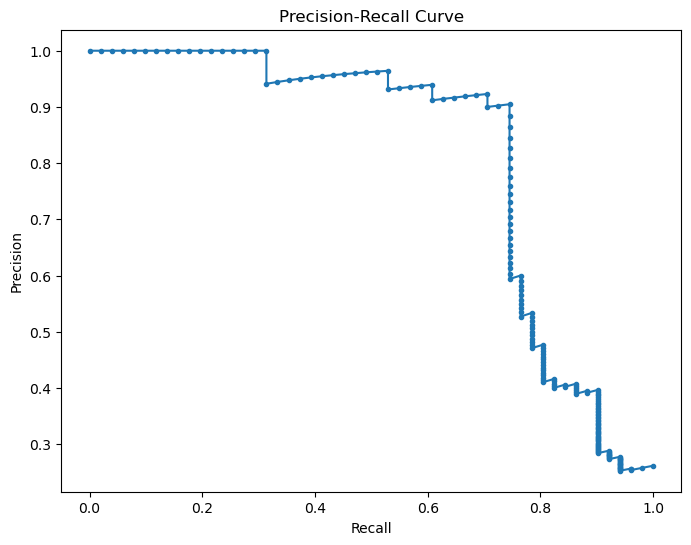


Random Forest Cross-Validation Scores: [0.94505495 0.95604396 0.95555556 0.96666667 0.95555556]
Mean CV Accuracy: 0.9557753357753358

XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       144
           1       0.93      0.73      0.81        51

    accuracy                           0.91       195
   macro avg       0.92      0.85      0.88       195
weighted avg       0.91      0.91      0.91       195

Confusion Matrix:
 [[141   3]
 [ 14  37]]
ROC-AUC: 0.852328431372549


In [108]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve


# 1. Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_rf_params = grid_search.best_params_
print("Best Parameters:", best_rf_params)

# Train Random Forest with best parameters
rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 2. Handling Class Imbalance - Using SMOTE for oversampling minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train Random Forest on SMOTE-resampled data
rf_model_resampled = RandomForestClassifier(**best_rf_params, random_state=42)
rf_model_resampled.fit(X_train_resampled, y_train_resampled)

# 3. Model Ensembling - Voting Classifier with Random Forest, Logistic Regression, and XGBoost
lr_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(random_state=42)  # Import XGBClassifier to avoid NameError

voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('lr', lr_model), ('xgb', xgb_model)], voting='soft')
voting_clf.fit(X_train_scaled, y_train)

# 4. Adjusting Thresholds to Increase Fraud Detection
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
y_pred_adjusted_rf = (y_pred_proba_rf > 0.3).astype(int)  # Adjusted threshold to 0.3

# 5. Evaluate the Models

# Random Forest (Original)
print("Random Forest Classification Report:")
y_pred_rf = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

# Random Forest with SMOTE Resampling
print("\nRandom Forest with SMOTE Resampling Classification Report:")
y_pred_rf_resampled = rf_model_resampled.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf_resampled))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_resampled))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf_resampled))

# Voting Classifier
print("\nVoting Classifier Classification Report:")
y_pred_voting = voting_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_voting))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_voting))

# Random Forest with Adjusted Threshold
print("\nRandom Forest with Adjusted Threshold Classification Report:")
print(classification_report(y_test, y_pred_adjusted_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_adjusted_rf))

# 6. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 7. Cross-Validation Scores for Random Forest
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Optionally, try XGBoost as an alternative model
print("\nXGBoost Model Evaluation:")
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))

In [109]:
joblib.dump(rf_model, 'model1.pkl')

['model1.pkl']

In [110]:
# Load the model
try:
    model = joblib.load('model1.pkl')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# Check the model type
print(f"Model type: {type(model)}")

Model loaded successfully.
Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
